<a href="https://colab.research.google.com/github/pemba007/cluster-ml/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
!pip install fuzzy-c-means

In [112]:
# Ignoring the warning
import warnings
warnings.filterwarnings("ignore")

In [113]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
# Reading dataset
df = pd.read_csv('./student-record.csv', names=['First_exam', 'Second_exam', 'Admission'])

In [115]:
df.head

<bound method NDFrame.head of     First_exam  Second_exam  Admission
0      34.6237      78.0247          0
1      30.2867      43.8950          0
2      35.8474      72.9022          0
3      45.0833      56.3164          0
4      95.8616      38.2253          0
..         ...          ...        ...
95     67.3193      66.5894          1
96     57.2387      59.5143          1
97     80.3668      90.9601          1
98     68.4685      85.5943          1
99     75.4777      90.4245          1

[100 rows x 3 columns]>

In [116]:
# Checking data shape
df.shape

(100, 3)

# Preprocessing

In [117]:
# Checking skewness
df.skew()

First_exam    -0.037111
Second_exam    0.054664
Admission     -0.414492
dtype: float64

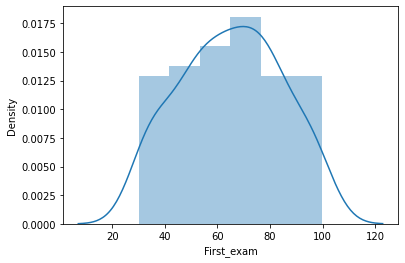

In [118]:
# Checking dataset distribution
sns.distplot(df['First_exam'])

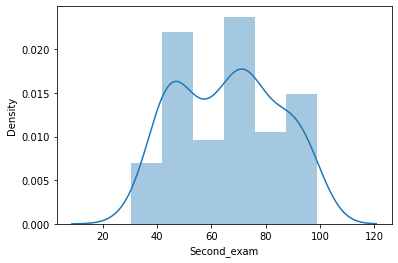

In [119]:
# Distribution of second_exam
sns.distplot(df['Second_exam'])

In [120]:
# Removing the admission feature because clustering is a unsupervised learning

y = df['Admission']
df.drop(columns=['Admission'], inplace = True)

In [121]:
df

,First_exam,Second_exam
0,34.6237,78.0247
1,30.2867,43.8950
2,35.8474,72.9022
3,45.0833,56.3164
4,95.8616,38.2253
...,...,...
95,67.3193,66.5894
96,57.2387,59.5143
97,80.3668,90.9601
98,68.4685,85.5943


In [122]:
# Normalizing the features First_exam and Second_exam

from sklearn.preprocessing import Normalizer

df = Normalizer().fit_transform(df)

# Training model

## Implementing Kmeans

[1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0]
Accuracy for fold $1 0.45


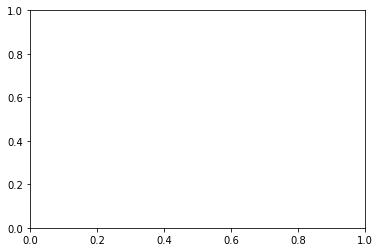

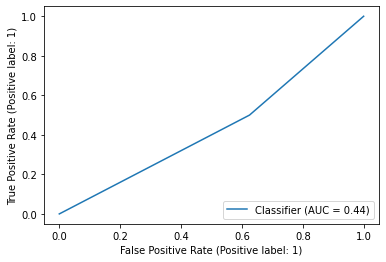

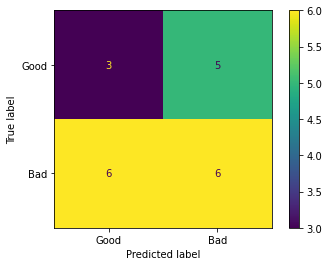

[0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0]
Accuracy for fold $2 0.4


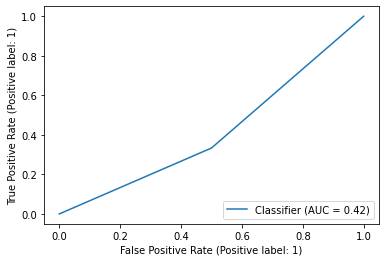

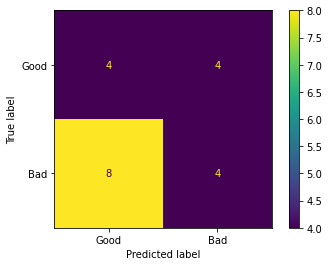

[1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0]
Accuracy for fold $3 0.55


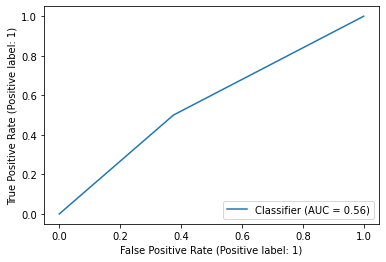

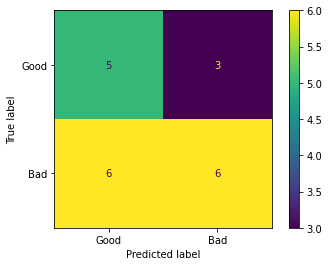

[1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1]
Accuracy for fold $4 0.5


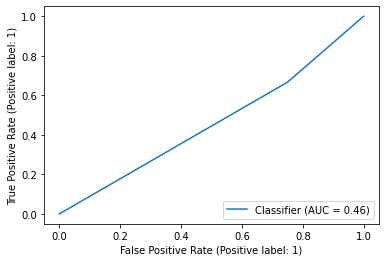

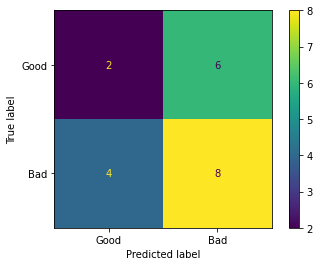

[1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0]
Accuracy for fold $5 0.4


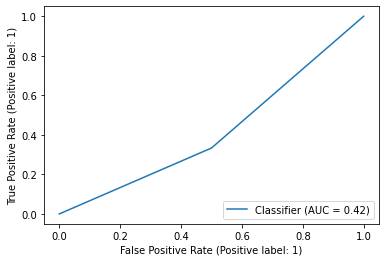

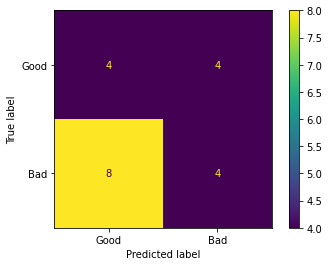

In [123]:
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, RocCurveDisplay, classification_report, auc, f1_score, confusion_matrix,roc_curve, ConfusionMatrixDisplay

# Stritified KFold implementation
skf = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

accuracies = list()
predicted_classes = list()
actual_classes = list()

for k, (train_index, test_index) in enumerate(skf.split(df, y)):
    X_train, X_test = df[train_index], df[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Training K means
    kmeans = KMeans(n_clusters=2).fit(X_train)

    # Predicting classes
    y_pred = kmeans.predict(X_test)

    print(y_pred)

    predicted_classes += y_pred.tolist()
    actual_classes += y_test.tolist()

    print(f"Accuracy for fold ${k+1}", accuracy_score(y_test, y_pred))
    RocCurveDisplay.from_predictions(y_test, y_pred)

    conf_mat = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=["Good", "Bad"]).plot()
    plt.show()

## Metrics for Kmeans

Accuracy : 0.46
Specificity : 0.5
Sensitivity : 0.3333333333333333
Area under curve:  0.45833333333333337
              precision    recall  f1-score   support

        Good       0.36      0.45      0.40        40
         Bad       0.56      0.47      0.51        60

    accuracy                           0.46       100
   macro avg       0.46      0.46      0.45       100
weighted avg       0.48      0.46      0.47       100



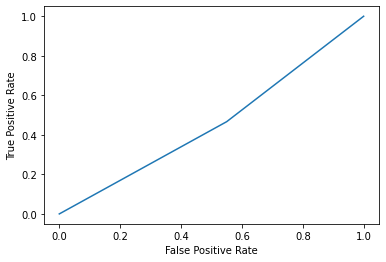

In [124]:
print("Accuracy :", accuracy_score(actual_classes, predicted_classes))

tn, fp, fn, tp = conf_mat.ravel()
print("Specificity :", (tn / (tn+fp)))
print("Sensitivity :", (tp / (tp+fn)))

fpr, tpr, _ = roc_curve(actual_classes, predicted_classes)
print("Area under curve: ", auc(fpr, tpr))
print(classification_report(actual_classes, predicted_classes, target_names = ['Good', 'Bad']))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()

## Implementing Fuzzy C Means

Accuracy for fold $1 0.45


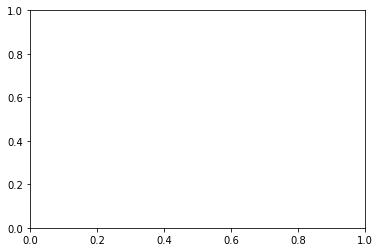

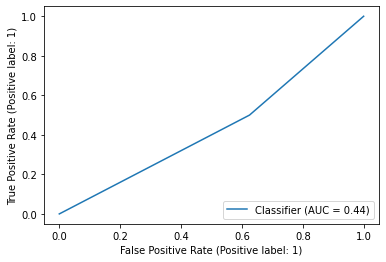

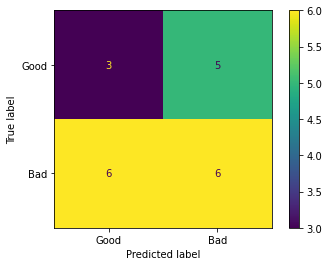

Accuracy for fold $2 0.4


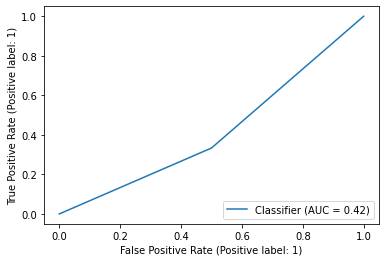

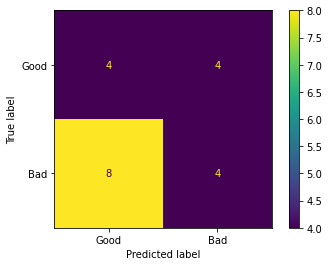

Accuracy for fold $3 0.45


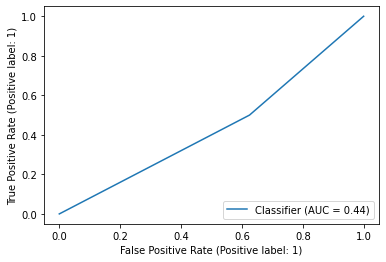

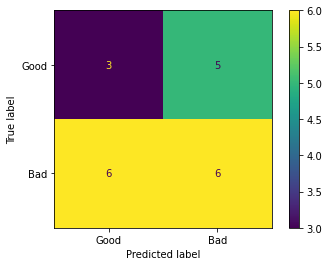

Accuracy for fold $4 0.5


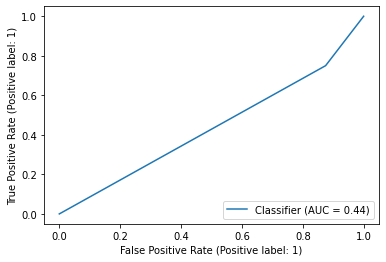

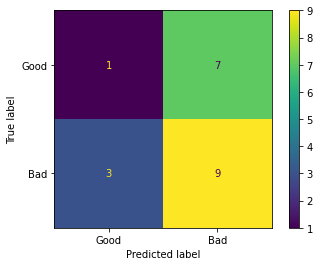

Accuracy for fold $5 0.6


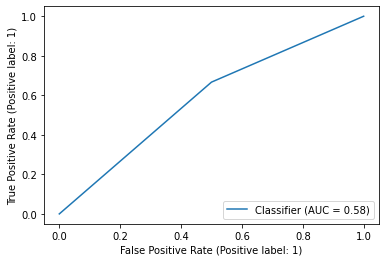

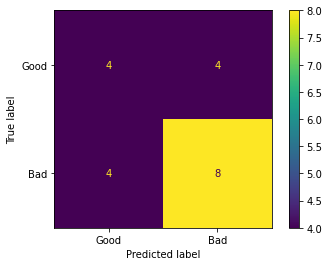

In [125]:
from fcmeans import FCM

# Stritified KFold implementation
skf = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

accuracies = list()
predicted_classes = list()
actual_classes = list()

for k, (train_index, test_index) in enumerate(skf.split(df, y)):
    X_train, X_test = df[train_index], df[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Training Fuzzy C means
    fcm = FCM(n_clusters=2)
    fcm.fit(X_train)

    # Predicting classes
    y_pred = fcm.predict(X_test)

    predicted_classes += y_pred.tolist()
    actual_classes += y_test.tolist()

    print(f"Accuracy for fold ${k+1}", accuracy_score(y_test, y_pred))
    RocCurveDisplay.from_predictions(y_test, y_pred)

    conf_mat = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(conf_mat, display_labels=["Good", "Bad"]).plot()
    plt.show()

## Metrics for Fuzzy C Means

Accuracy : 0.48
Specificity : 0.5
Sensitivity : 0.6666666666666666
Area under curve:  0.4625
              precision    recall  f1-score   support

        Good       0.36      0.38      0.37        40
         Bad       0.57      0.55      0.56        60

    accuracy                           0.48       100
   macro avg       0.46      0.46      0.46       100
weighted avg       0.48      0.48      0.48       100



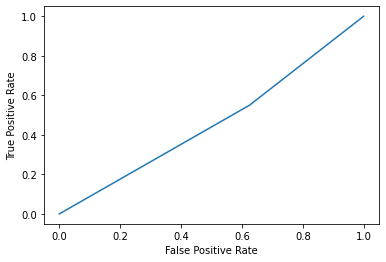

In [126]:
print("Accuracy :", accuracy_score(actual_classes, predicted_classes))

tn, fp, fn, tp = conf_mat.ravel()
print("Specificity :", (tn / (tn+fp)))
print("Sensitivity :", (tp / (tp+fn)))

fpr, tpr, _ = roc_curve(actual_classes, predicted_classes)
print("Area under curve: ", auc(fpr, tpr))
print(classification_report(actual_classes, predicted_classes, target_names = ['Good', 'Bad']))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()